In [20]:
#extract from paper 2006 Comprehensive Learning PSO for Global Op of Multimodel Functions
import numpy as np
import matplotlib.pyplot as plt


In [21]:
#sphere function
def Sphere(x):
    z = np.sum(np.square(x))
    return z

In [22]:
#parameter setting
d = 10 #dimension
xMin, xMax = -100, 100 #limit of search space range
vMin, vMax = -0.2*(xMax - xMin), 0.2*(xMax - xMin)
MaxIt = 3000
ps = 10 #population size
c1 = 2
c2 = 2
w = 0.9 - ((0.9 - 0.4)/MaxIt)*np.linspace(0,MaxIt,MaxIt)

def limitV(V):
    for i in range(len(V)):
        if V[i] > vMax:
            V[i] = vMax
        elif V[i] < vMin:
            V[i] = vMin
    return V


def limitX(X):
    for i in range(len(X)):
        if X[i] > xMax:
            X[i] = xMax
        elif X[i] < xMin:
            X[i] = xMin

In [23]:
#Algorithm
def Optimization():
        class Particle():
                def __init__(self):
                        self.position = np.random.uniform(xMin, 50, [ps, d])
                        self.velocity = np.random.uniform(vMin, vMax, [ps,d])
                        self.cost = np.zeros(ps)
                        self.cost[ : ] = Sphere(self.position[ : ])
                        self.pbest = np.copy(self.position)
                        self.pbest_cost = np.copy(self.cost)
                        self.index = np.argmin(self.pbest_cost)
                        self.gbest = self.pbest[self.index]
                        self.gbest_cost = self.pbest_cost[self.index]
                        self.BestCost = np.zeros(MaxIt)

                def Evaluate(self): #loop comment from o to maxIt
                       for it in range(MaxIt):
                              for i in range(ps):
                                     self.velocity[i] = (w[it]*self.velocity[i] 
                                                                + c1*np.random.rand(d)*(self.pbest[i] - self.position[i])) + c2*np.random.rand(d)* (self.gbest[i] - self.position[i])
                                     self.velocity[i] = limitV(self.velocity[i])
                                     self.position[i] = self.position[i] + self.velocity[i]
                                     self.position[i] = limitX(self.position[i])
                                     self.cost[i] = Sphere(self.position[i])
                                     if self.cost[i] < self.pbest_cost[i]:
                                        self.pbest[i] = self.position[i]
                                        self.pbest_cost[i] = self.cost[i]
                                        if self.pbest_cost[i] < self.gbest_cost:
                                                self.gbest = self.pbest[i]
                                                self.gbest = self.pbest_cost[i]
                                        self.BestCost[it] = self.gbest_cost            
                def Plot(self):
                        plt.semilogy(self.BestCost)
                        plt.ylim([10e-120, 10e20])
                        plt.xlim([0, 3000])
                        plt.ylabel("Best Function Value")
                        plt.xlabel("Number of Iteration")
                        plt.title("Particle Swarm Optimization of Sphere Function")
                        print("Best fitness value = ", self.gbest_cost)
        a = Particle( )
        a.Evaluate( )
        a.Plot( )        
                     

C:\Users\Char Lim\AppData\Local\Temp\ipykernel_25432\2747733607.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.ylim([10e-120, 10e20])


Best fitness value =  285178.22441680747


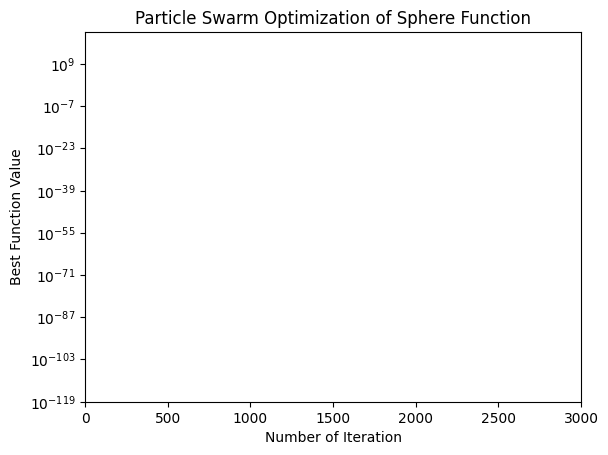

In [24]:
#optimization
Optimization()
